### Assignment 2

### Question 1

Consider the following LP problem:
$$\max_x    x_2$$
$$-x_1 + x_2 \leq 1$$
$$-0.5 x_1 + x_2 \leq 2$$
$$x_1 + x_2 \leq 9$$
$$0.5 x_1 + x_2 \leq 6$$
$$x_1 \geq 0, x_2 \geq 0$$




###### A. Use Julia's solver to find the solution.

In [157]:
using JuMP, GLPK

model1 = Model(with_optimizer(GLPK.Optimizer))

Ct = [0; 1; 0; 0; 0; 0]
A = [-1 1 1 0 0 0;
    -0.5 1 0 1 0 0;
     1 1 0 0 1 0;
     0.5 1 0 0 0 1]
b = [1; 2; 9; 6]

m, n = size(A)

@variable(model1, x[1:n] >= 0)
@constraint(model1, A * x[1:n] .== b)
@objective(model1, Max, sum(Ct .* x))

println("The optimization problem to solve:")
println(model1)

@time begin
    stats = optimize!(model1)
end

println("The optimal objective values is ", JuMP.objective_value(model1))
println("The corresponding values of the variables are: ")
println("    x1: ", JuMP.value(x[1]), "; ", "x2: ", JuMP.value(x[2]))

The optimization problem to solve:
Max x[2]
Subject to
 -x[1] + x[2] + x[3] = 1.0
 -0.5 x[1] + x[2] + x[4] = 2.0
 x[1] + x[2] + x[5] = 9.0
 0.5 x[1] + x[2] + x[6] = 6.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0
 x[6] ≥ 0.0

  0.000214 seconds (793 allocations: 51.609 KiB)
The optimal objective values is 4.0
The corresponding values of the variables are: 
    x1: 4.0; x2: 4.0
[4.0, 4.0, 1.0, 0.0, 1.0, 0.0]


###### B. What is the value of the objective function evaluated at the optimal solution?

Answer: $x_2 = 4$.

###### C. Draw the constraints and the objective function at the optimal level.

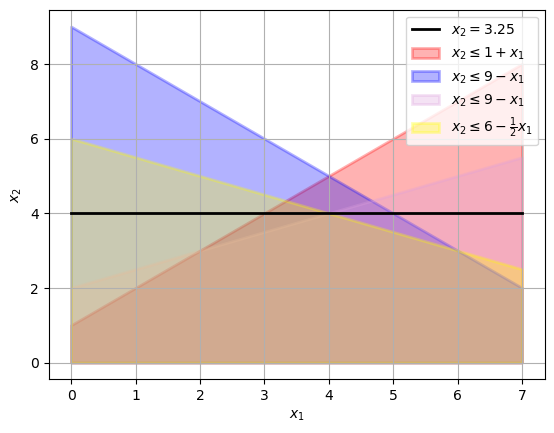

In [133]:
using PyPlot
PyPlot.svg(true)

x1 = collect(0:0.1:7)
x2a = 1 .+ x1
x2b = ifelse.(9 .- x1 .>= 0, 9 .- x1, NaN)
x2c = ifelse.(2 .+ 0.5.*x1 .>= 0, 2 .+ 0.5.*x1, NaN)
x2d = ifelse.(6 .- 0.5.*x1 .>= 0, 6 .- 0.5.*x1, NaN)
x2e = fill(4, length(x1))

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 + x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 9 - x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2c,color="plum",linewidth=2,label=L"x_{2} \leq 9 - x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2d,color="yellow",linewidth=2,label=L"x_{2} \leq 6 - \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2e,color="black",linewidth=2,label=L"x_{2} = 3.25}",alpha=1);
ax.legend(loc="upper right");
xlabel(L"x_{1}"), ylabel(L"x_{2}")
ax.grid(true)


###### D. Justify the optimal solution.

Answer: the polyhedron of feasible region only intersects with the line $x_2 = 4$ once at $(x_1=4, x_2=4)$, the point is hence the only optimal solution.

### Question 2

Consider the following LP problem:
$$\max_x    6x_1 + 4x_2$$
$$2x_1 + 3x_2 \leq 9$$
$$x_1 \leq 3$$
$$x_2 \leq 2$$
$$x_1 \geq 0, x_2 \geq 0$$

###### A. Use Julia's solver to find the solution.

In [173]:
Ct = [6; 4; 0; 0; 0]
A = [2 3 1 0 0;
     1 0 0 1 0;
     0 1 0 0 1]
b = [9; 3; 2]

model2 = Model(with_optimizer(GLPK.Optimizer))

m, n = size(A)

@variable(model2, x[1:n] >= 0)
@constraint(model2, A * x .== b)
@objective(model2, Max, sum(Ct.*x))

@time begin
    optimize!(model2)
end

println("The optimization problem to solve:")
println(model2)

println("The optimal objective values is ", JuMP.objective_value(model2))
println("The corresponding values of the variables are: ")
println("    x1: ", JuMP.value(x[1]), "; ", "x2: ", JuMP.value(x[2]))


  0.000244 seconds (750 allocations: 49.938 KiB)
The optimization problem to solve:
Max 6 x[1] + 4 x[2]
Subject to
 2 x[1] + 3 x[2] + x[3] = 9.0
 x[1] + x[4] = 3.0
 x[2] + x[5] = 2.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0

The optimal objective values is 22.0
The corresponding values of the variables are: 
    x1: 3.0; x2: 1.0


###### B. What is the value of the objective function evaluated at the optimal solution?

Answer: $6x_1 + 4x_2 = 22$.

###### C. Draw the constraints and the objective function at the optimal level.

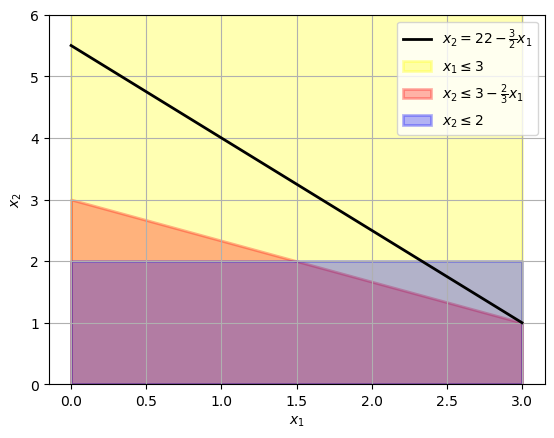

In [137]:
x1 = collect(0:0.1:3)
x1a = fill(999, length(x1))
x2a = 3 .- (2/3).*x1
x2b = 2
x2c = 5.5 .- (3/2).*x1

fig, ax = subplots();
ax.fill_between(x1,x1a,color="yellow",linewidth=2,label=L"x_{1} \leq 3}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 3 - \frac{2}{3}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2}",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2c,color="black",linewidth=2,label=L"x_{2} = 5.5 - \frac{3}{2}x_1",alpha=1);
ax.legend(loc="upper right");
ylim([0, 6])
xlabel(L"x_{1}"), ylabel(L"x_{2}")
ax.grid(true)

###### D. Justify the optimal solution

Answer: the polyhedron of feasible region only intersects with the line $x_2 = 5.5 - \frac{3}{2}x_1$ once at $(x_1=3, x_2=1)$, the point is hence the only optimal solution.

### Question 3
Consider the following short-term financing problem of a corporation. The treasury deparment determined the company's net cash flow as described in the table below:

| Month | Jul 2013 | Aug 2013 | Sept 2013 | Oct 2013 | Nov 2013 | Dec 2013 |
| --- | --- | --- | --- | --- | --- | --- |
| NCF | -250 | -50 | 225 | -175 | 150 | 400 |

Notes: In thousands of dollars. NCF = Net Cash Flow
The company has two methods to conduct short-term financing. It can borrow up to $100k monthly at a  0.5%
  interest rate per month. It can also issue a 3-month zero-coupon bond at  1.5%
  for a three month period. Any available cash at the end of each month can earn  0.2%
  interest rate per month.

###### A. For each month, find the amount of borrowing between the two instruments that maximizes the total amount of cash available in December 2013.

Let
<br>the amount of balance on the credit line in month $i$ be $x_{i}$,
<br>the amount of zero-coupon bond issued in month $i$ be $y_{i}$, 
<br>the amount of excess funds in month $i$ be $z_{i}$ and
<br>$v$ be the company's wealth in December.

Then, the optimization problem to solve becomes
$$\max_{z_6}    z_6 \geq 0$$
$$x_1 + y_1 - z_1 = 250$$
$$x_2 - 1.005x_1 + y_2 - z_2 + 1.002z_1 = 50$$
$$x_3 - 1.005x_2 + y_3 - z_3 + 1.002z_2= -225$$
$$x_4 - 1.005x_3 - 1.015y_1 - z_4 + 1.002z_3= 175$$
$$x_5 - 1.005x_4 - 1.015y_2 - z_5 + 1.002z_4= -150$$
$$- 1.005x_5 - 1.015y_3 + 1.002z_5 + z_6=-400$$
$$0 \leq x_i \leq 100$$
$$y_i, z_i \geq 0$$

In [206]:
model3 = Model(with_optimizer(GLPK.Optimizer))

Ax = [1 0 0 0 0 0;
     -1.005 1 0 0 0 0;
     0 -1.005 1 0 0 0;
     0 0 -1.005 1 0 0;
     0 0 0 -1.005 1 0;
     0 0 0 0 -1.005 0;]

Ay = [1 0 0 0 0 0;
     0 1 0 0 0 0;
     0 0 1 0 0 0;
     -1.015 0 0 0 0 0;
     0 -1.015 0 0 0 0;
     0 0 -1.015 0 0 0]

Az = [-1 0 0 0 0 0;
     1.002 -1 0 0 0 0;
     0 1.002 -1 0 0 0;
     0 0 1.002 -1 0 0;
     0 0 0 1.002 -1 0;
     0 0 0 0 1.002 -1]

A = hcat(Ax, Ay, Az)

# A = [1 0 0 0 0 0 1 0 0 0 0 0 -1 0 0 0 0 0;
#      -1.005 1 0 0 0 0 0 1 0 0 0 0 1.002 -1 0 0 0 0;
#      0 -1.005 1 0 0 0 0 0 1 0 0 0 0 1.002 -1 0 0 0;
#      0 0 -1.005 1 0 0 -1.015 0 0 0 0 0 0 0 1.002 -1 0 0;
#      0 0 0 -1.005 1 0 0 -1.015 0 0 0 0 0 0 0 1.002 -1 0;
#      0 0 0 0 -1.005 0 0 0 -1.015 0 0 0 0 0 0 0 1.002 -1]

b = [250; 50; -225; 175; -150; -400]

Ct = [0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1]
@variable(model3, 0 <= x[1:6] <= 100)
@variable(model3, y[1:6] >= 0)
@variable(model3, z[1:6] >= 0)
@constraint(model3, A * vcat(x, y, z) .== b )
@objective(model3, Max, sum(Ct .* vcat(x, y, z)))

@time begin
    optimize!(model3)
end

println("The optimization problem to solve:")
println(model3)

println("The optimal objective values is ", JuMP.objective_value(model3))
println("x: ", JuMP.value.(x))
println("y: ", JuMP.value.(y))
println("z: ", JuMP.value.(z))


  0.000288 seconds (1.15 k allocations: 71.984 KiB)
The optimization problem to solve:
Max z[6]
Subject to
 x[1] + y[1] - z[1] = 250.0
 -1.005 x[1] + x[2] + y[2] + 1.002 z[1] - z[2] = 50.0
 -1.005 x[2] + x[3] + y[3] + 1.002 z[2] - z[3] = -225.0
 -1.005 x[3] + x[4] - 1.015 y[1] + 1.002 z[3] - z[4] = 175.0
 -1.005 x[4] + x[5] - 1.015 y[2] + 1.002 z[4] - z[5] = -150.0
 -1.005 x[5] - 1.015 y[3] + 1.002 z[5] - z[6] = -400.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0
 x[6] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 y[3] ≥ 0.0
 y[4] ≥ 0.0
 y[5] ≥ 0.0
 y[6] ≥ 0.0
 z[1] ≥ 0.0
 z[2] ≥ 0.0
 z[3] ≥ 0.0
 z[4] ≥ 0.0
 z[5] ≥ 0.0
 z[6] ≥ 0.0
 x[1] ≤ 100.0
 x[2] ≤ 100.0
 x[3] ≤ 100.0
 x[4] ≤ 100.0
 x[5] ≤ 100.0
 x[6] ≤ 100.0

The optimal objective values is 294.4028592065869
x: [100.0, 100.0, 0.0, 100.0, 1.7574999999999648, 0.0]
y: [150.0, 50.499999999999986, 102.2964071856287, 0.0, 0.0, 0.0]
z: [0.0, 0.0, 226.7964071856287, 0.0, 0.0, 294.4028592065869]


###### B. What is the optimal amount of cash on Dec 2013?

Answer: $ 294.40.

######  C. Interpret the results and develop a storyline implied by the LP solution.